# Redo of exercise 1 more generalised

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

plt.style.use("../base.mplstyle")

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [3]:
df = df.fillna("0")

In [4]:
nordic = ["Sweden", "Norway", "Finland", "Denmark"]
for country in nordic:
    df[country] = df[country].str.replace(",","").astype(int)

df["Sweden"].info

<bound method Series.info of 0       200
1        65
2       186
3         5
4        32
       ... 
156      45
157    7542
158     289
159      10
160     343
Name: Sweden, Length: 161, dtype: int64>

In [5]:
#get Nordic 3 states
df_nordic = df[["State", "Sweden", "Norway", "Denmark", "Finland"]].groupby("State").sum()
df_nordic = df_nordic.reset_index()
df_nordic

,State,Sweden,Norway,Denmark,Finland
0,Alabama,86,85,32,5
1,Arkansas,50,5,9,0
2,California,7223,2729,3082,986
3,Colorado,3767,429,618,45
4,Connecticut,6647,273,1144,41
5,Delaware,261,15,31,23
6,District of Columbia,234,101,88,14
7,Florida,40,6,7,4
8,Georgia,89,71,32,6
9,Hawaii,77,69,48,8


In [6]:
nordic_w_tot = duckdb.query("""--sql
    SELECT *, sweden+norway+finland+denmark as nordic_tot
    FROM df_nordic
    ORDER BY nordic_tot DESC
""").df()
nordic_top3 = nordic_w_tot.iloc[:3,:5].set_index("State")
nordic_top3

,Sweden,Norway,Denmark,Finland
State,,,,
Illinois,57158,22300,10374,447
Minnesota,34984,17087,2975,1101
New York,29961,11752,6186,3764


<Axes: title={'left': 'Top 3 states with most Nordic immigrants'}, xlabel='STATE', ylabel='# OF FOREIGNERS'>

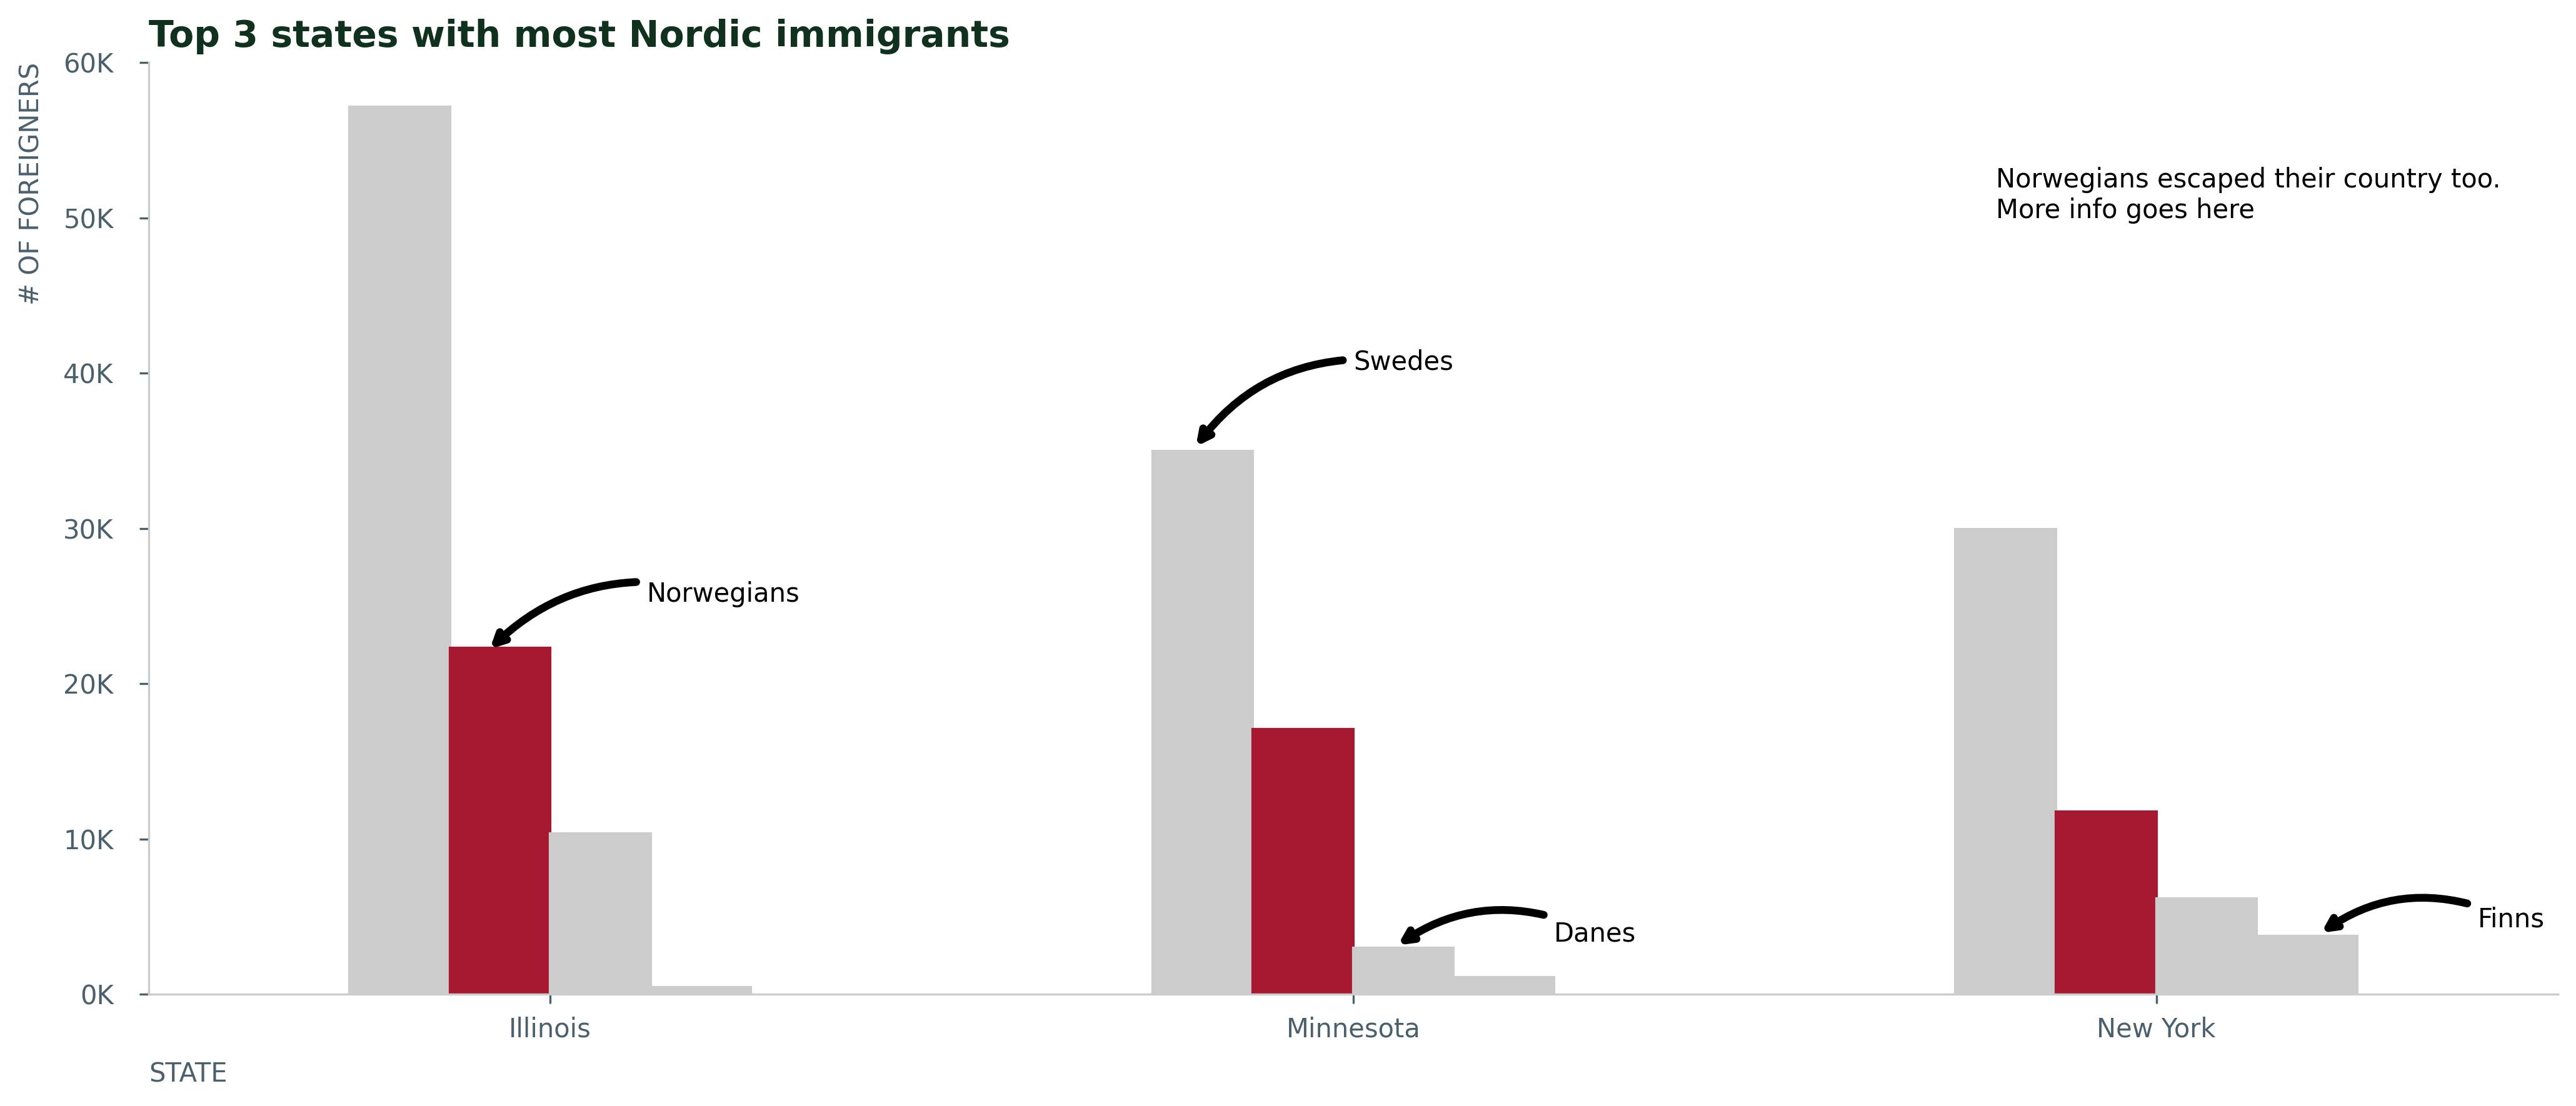

In [ ]:
from plotter import plotter, annotater, formatter
ax = nordic_top3.plot(kind="bar")

annotater(ax, text="Swedes", xy= (.8, 35000))
annotater(ax, text="Norwegians", xy= (-.08, 22000))
annotater(ax, text="Danes", xy= (1.05, nordic_top3["Denmark"].loc["Minnesota"]))
annotater(ax, text="Finns", xy= (2.20, nordic_top3["Finland"].loc["New York"]))
annotater(ax, text="Norwegians escaped their country too.\nMore info goes here", xy = (1.8,50000), arrow=False)

ax.yaxis.set_major_formatter(formatter)

for i in range(3):
    for j in range(4):
        ax.containers[1][i].set_color("#A71930")
        ax.containers[j][i].set_color("#CCCCCC")

plotter(ax, title = "Top 3 states with most Nordic immigrants", xlabel = "STATE", ylabel="# OF FOREIGNERS", tp_axis= "x", path="../figures/exercise1_encore")